In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train_data=pd.read_excel(r"C:\Users\abhis\OneDrive\Desktop\iNeuron internship\Flight Fare Price Prediction\Data_Train.xlsx")

In [3]:
train_data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.dropna(inplace=True)

In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [7]:
##separating day and month from journey date
train_data['Journey_Day']=pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day
train_data['Journey_Month']=pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.month

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

**DEP TIME**

In [8]:
##separating hour and minutes from departure time
train_data['Dep_hours']=pd.to_datetime(train_data.Dep_Time).dt.hour
train_data['Dep_minutes']=pd.to_datetime(train_data.Dep_Time).dt.minute

**ARRIVAL TIME**

In [9]:
##Separating hour and minutes from Arrival Time
train_data['Arrival_hour']=pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data['Arrival_minutes']=pd.to_datetime(train_data.Arrival_Time).dt.minute

In [10]:
##droping arrival time and dep time
train_data.drop(['Dep_Time'],axis=1,inplace=True)
train_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [11]:
train_data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hours,Dep_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


**Duration**

In [12]:
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [13]:
train_data["Duration_hours"]=duration_hours
train_data["Duration_mins"]=duration_mins

In [14]:
##droping duration column
train_data.drop(['Duration'],axis=1,inplace=True)

*OHE ON Airline*

In [15]:
##AIRLINES

train_data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

<AxesSubplot: xlabel='Airline', ylabel='Price'>

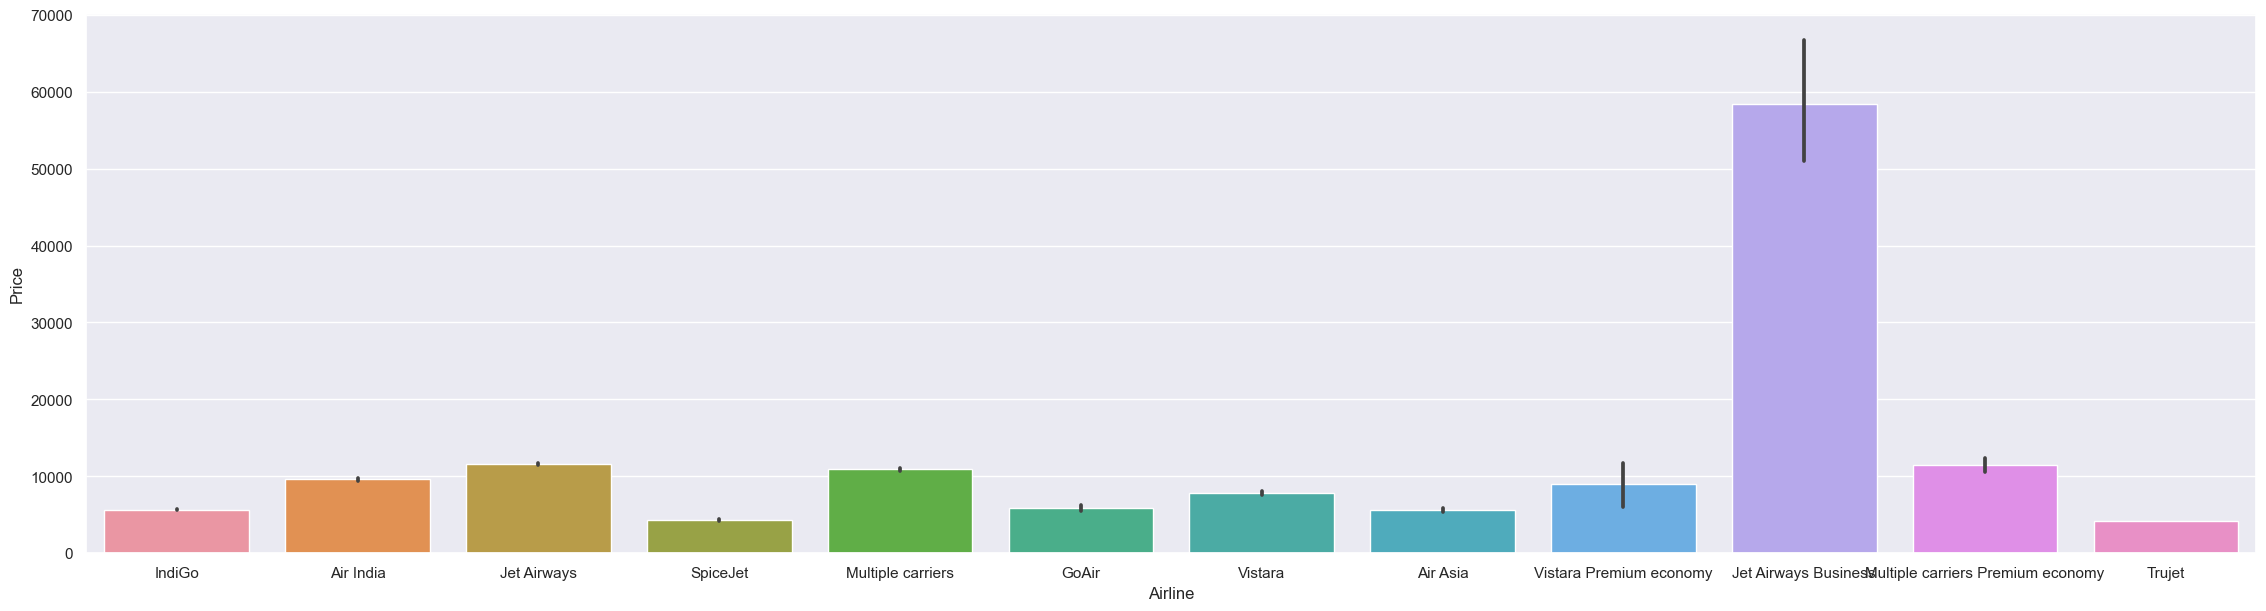

In [16]:
##visualizing the data
sns.set(rc={'figure.figsize':(28,7)})
sns.barplot(data=train_data ,x=train_data['Airline'], y=train_data['Price'])


##Jet Airways Business is having the highest price              
##All other airlines have similar prices              
##Jet Airway Business may act as an outliner          

In [17]:
##OneHotEncoding on Airlines
Airline_OHE = train_data[["Airline"]]
Airline_OHE = pd.get_dummies(Airline_OHE, drop_first= True)
Airline_OHE.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


<AxesSubplot: xlabel='Source', ylabel='Price'>

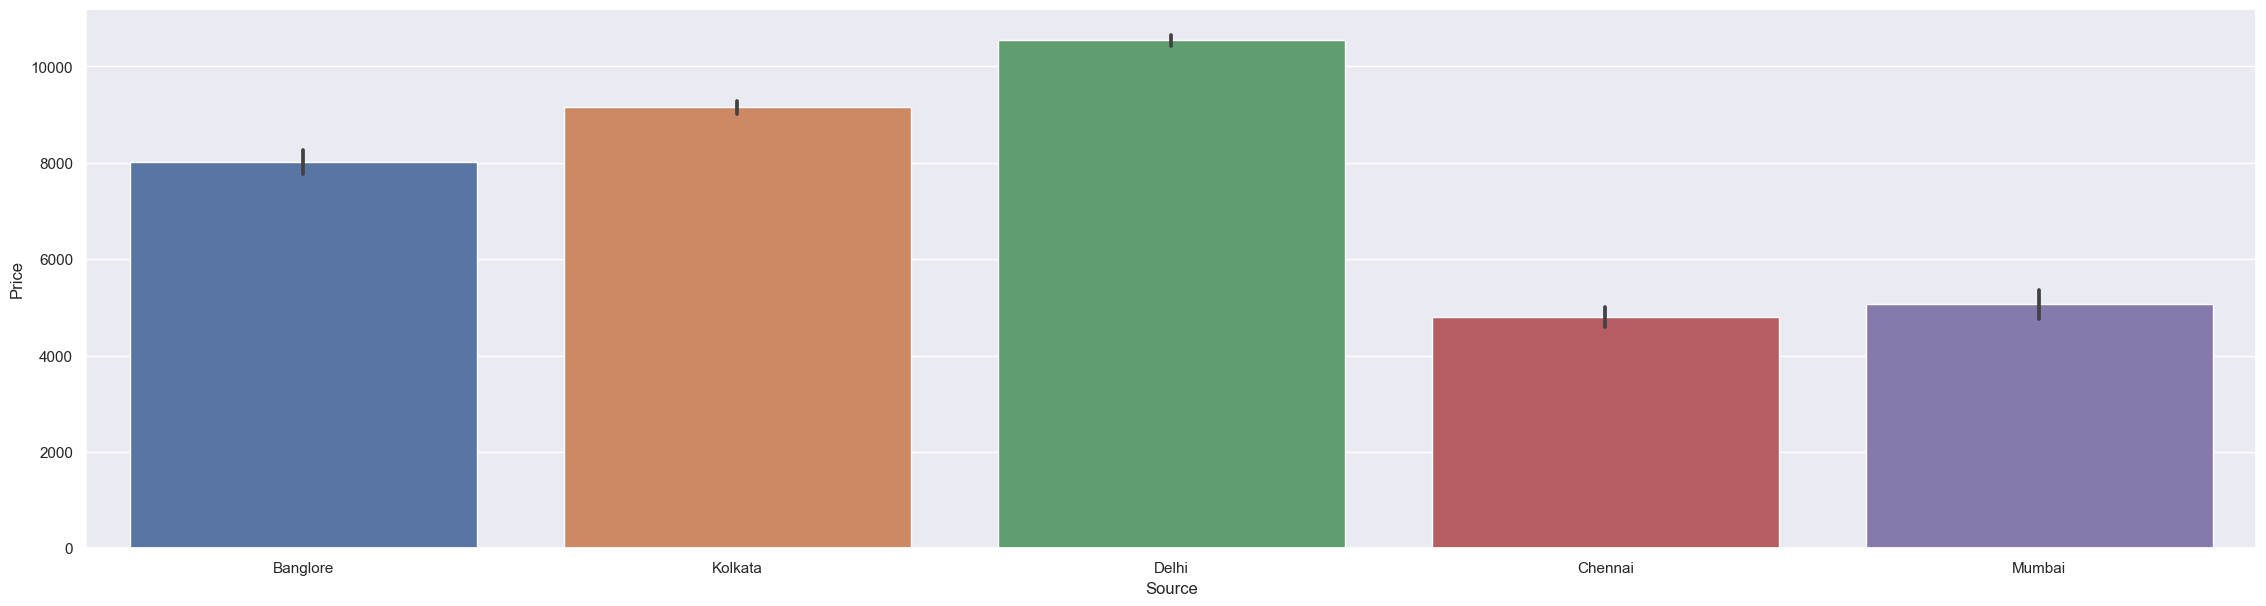

In [18]:
##Visualizing Source and Dest
sns.barplot(data=train_data ,x=train_data['Source'], y=train_data['Price'])

<AxesSubplot: xlabel='Destination', ylabel='Price'>

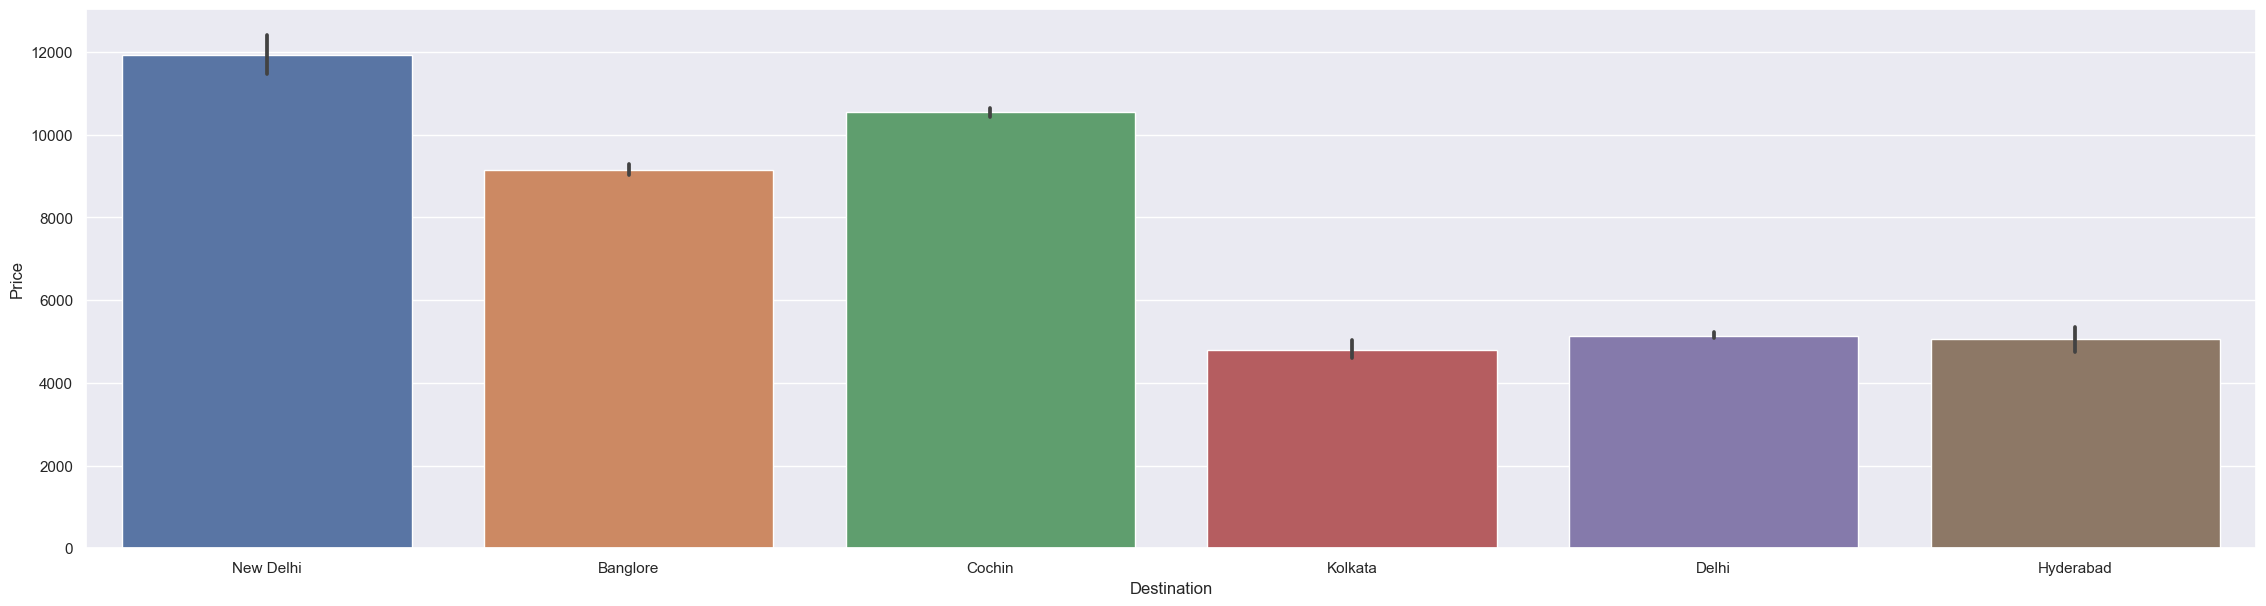

In [19]:
sns.barplot(data=train_data ,x=train_data['Destination'], y=train_data['Price'])

**OHE on Source and DEstination**

In [20]:
##OHE on Source and Destination
Source_OHE=train_data[['Source']]
Source_OHE=pd.get_dummies(Source_OHE,drop_first=True)

Dest_OHE=train_data[['Destination']]
Dest_OHE=pd.get_dummies(Dest_OHE,drop_first=True)

**Preprocessing on Additional info and Route features**

In [21]:
train_data.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

**For Additional_Info, 80% of the observations say no_info, so doesn’t add much value.**

In [22]:
train_data.drop(['Additional_Info'], axis=1, inplace=True)

In [23]:
##Route is almost equal to Total_stops
train_data.drop(['Route'], axis=1, inplace=True)

<AxesSubplot: xlabel='Total_Stops', ylabel='Price'>

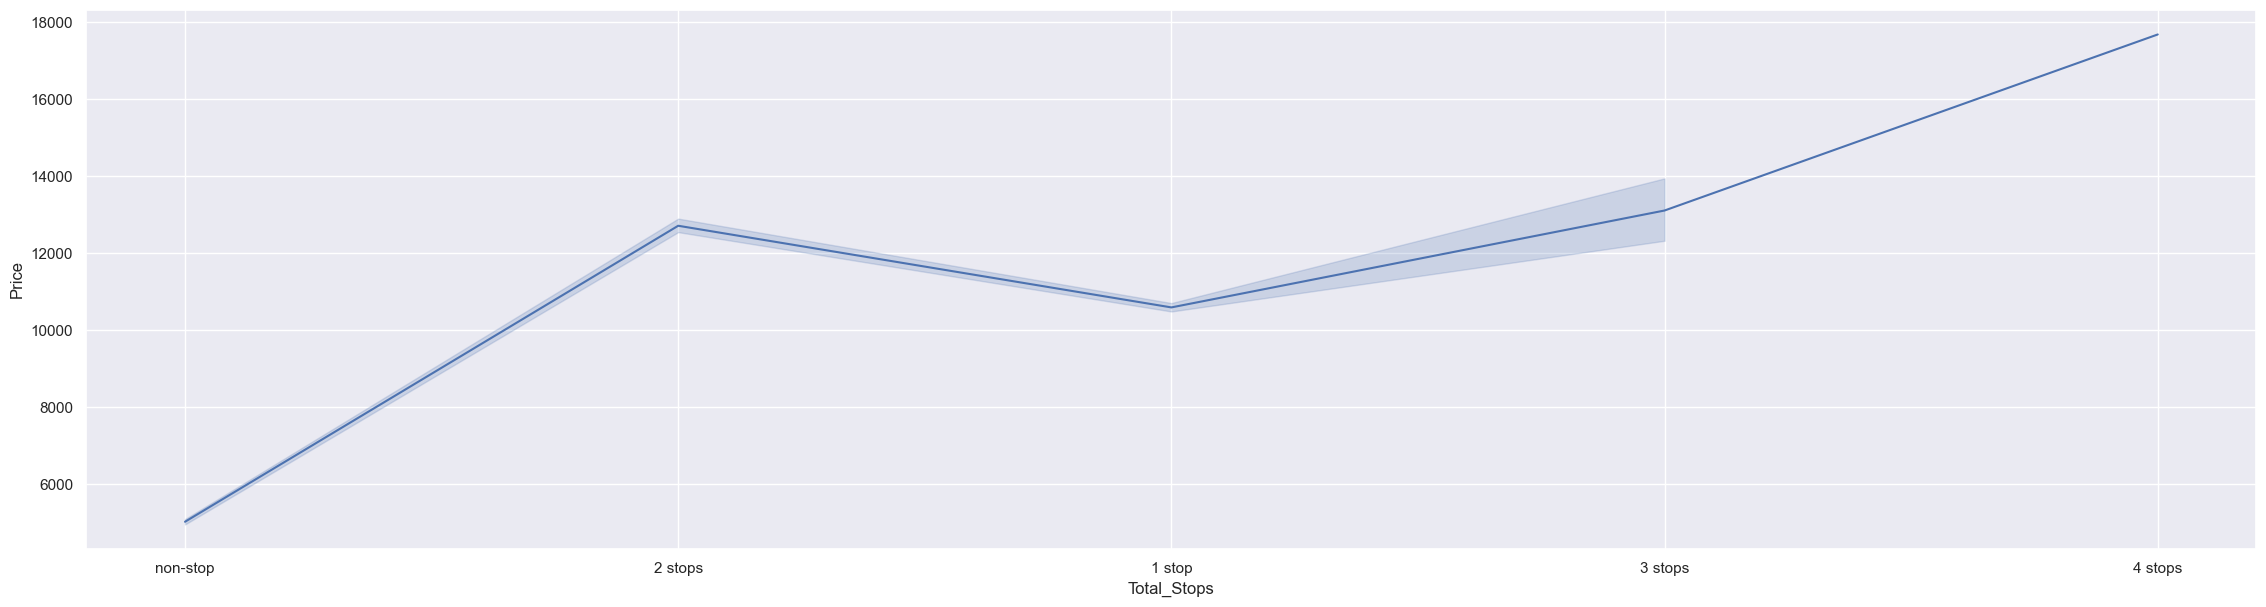

In [24]:
sns.lineplot(data=train_data, x=train_data['Total_Stops'], y=train_data['Price'])

**Total_Stops**     

We can see that as number of stops increases, price also increases.           
Thus, we can define an order/rank for this categorical data.

In [25]:
##we assign customised ranks for each category

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [26]:
train_data.Total_Stops.value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [27]:
data_train = pd.concat([train_data, Airline_OHE, Source_OHE, Dest_OHE], axis = 1)

In [28]:
data_train.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_Day', 'Journey_Month', 'Dep_hours', 'Dep_minutes',
       'Arrival_hour', 'Arrival_minutes', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [29]:
##Deleting object type features of no use
data_train.drop(['Airline','Source','Destination'],axis=1, inplace=True)

In [30]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int64
 1   Price                                      10682 non-null  int64
 2   Journey_Day                                10682 non-null  int64
 3   Journey_Month                              10682 non-null  int64
 4   Dep_hours                                  10682 non-null  int64
 5   Dep_minutes                                10682 non-null  int64
 6   Arrival_hour                               10682 non-null  int64
 7   Arrival_minutes                            10682 non-null  int64
 8   Duration_hours                             10682 non-null  int64
 9   Duration_mins                              10682 non-null  int64
 10  Airline_Air India                          106

In [31]:
##saving file
data_train.to_excel('Train_data_final.xlsx')

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

***Test Data***

In [32]:
test_data=pd.read_excel(r"C:\Users\abhis\OneDrive\Desktop\iNeuron internship\Flight Fare Price Prediction\Test_set.xlsx")

In [33]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [34]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

*Data Preprocessing*

In [35]:
##separating day and month from journey date
test_data['Journey_Day']=pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data['Journey_Month']=pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.month

test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

##separating hour and minutes from departure time
test_data['Dep_hours']=pd.to_datetime(test_data.Dep_Time).dt.hour
test_data['Dep_minutes']=pd.to_datetime(test_data.Dep_Time).dt.minute

##Separating hour and minutes from Arrival Time
test_data['Arrival_hour']=pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data['Arrival_minutes']=pd.to_datetime(test_data.Arrival_Time).dt.minute

##droping arrival time and dep time
test_data.drop(['Dep_Time'],axis=1,inplace=True)
test_data.drop(['Arrival_Time'],axis=1,inplace=True)

*Preprocessing Duration feature*

In [36]:
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

In [37]:
##Performing OHE on categorical data

Airline_OHE = test_data[["Airline"]]
Airline_OHE = pd.get_dummies(Airline_OHE, drop_first= True)

Source_OHE=test_data[['Source']]
Source_OHE=pd.get_dummies(Source_OHE,drop_first=True)

Dest_OHE=test_data[['Destination']]
Dest_OHE=pd.get_dummies(Dest_OHE,drop_first=True)

In [38]:
##we assign customised ranks for each category

test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [39]:
##Dropping unnecessary features
test_data.drop(['Additional_Info'], axis=1, inplace=True)
test_data.drop(['Route'], axis=1, inplace=True)

In [40]:
data_test = pd.concat([test_data, Airline_OHE, Source_OHE, Dest_OHE], axis = 1)
data_test.drop(['Airline','Source','Destination'],axis=1, inplace=True)
data_test.shape

(2671, 28)

In [41]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                2671 non-null   int64
 1   Journey_Day                                2671 non-null   int64
 2   Journey_Month                              2671 non-null   int64
 3   Dep_hours                                  2671 non-null   int64
 4   Dep_minutes                                2671 non-null   int64
 5   Arrival_hour                               2671 non-null   int64
 6   Arrival_minutes                            2671 non-null   int64
 7   Duration_hours                             2671 non-null   int64
 8   Duration_mins                              2671 non-null   int64
 9   Airline_Air India                          2671 non-null   uint8
 10  Airline_GoAir                              2671 

In [42]:
##saving file
data_test.to_excel('Test_data_final.xlsx')